Titanic Survival Prediction

Work flow consists of
1) Analysing the data
2) Cleaning up the data
3) Preparing the data
4) Explorataroy data analysis using Matplotlib, Seaborn
5) Feature Engineering
6) Applying various ML algorithm Models
7) Validating the Prediction Accuracy

In [231]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [169]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv('titanic_test.csv')

In [170]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [172]:
titanic_train.shape

(891, 12)

In [173]:
titanic_test.shape

(418, 11)

In [174]:
titanic_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [175]:
titanic_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

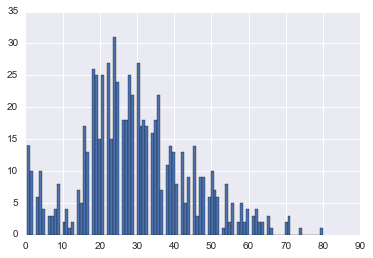

In [176]:
titanic_train['Age'].hist(bins = 100)

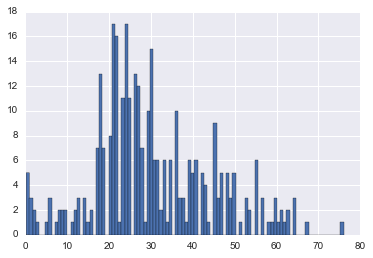

In [177]:
titanic_test['Age'].hist(bins = 100)

In [178]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [179]:
titanic_train[titanic_train['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [180]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
644+168+77

889

In [181]:
titanic_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

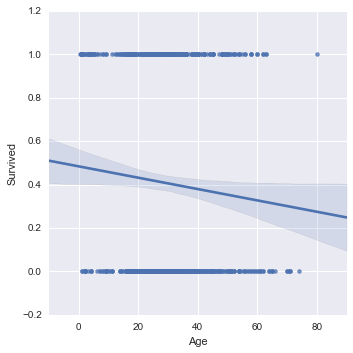

In [182]:
sns.lmplot('Age','Survived',data = titanic_train)

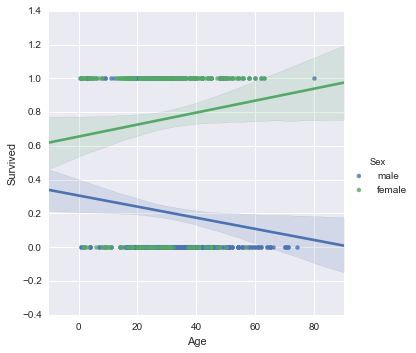

In [183]:
sns.lmplot('Age','Survived',data = titanic_train,hue = 'Sex')

In [194]:
titanic_train.groupby(['Survived', 'Pclass','Sex'])['Survived'].count()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: Survived, dtype: int64

In [192]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16 :
        return 'Child'
    else:
        return sex


In [197]:
titanic_train['Person']= df[['Age','Sex']].apply(male_female_child,axis = 1)
titanic_test['Person']= df[['Age','Sex']].apply(male_female_child,axis = 1)

In [207]:
titanic_train['Alone'] = titanic_train['SibSp'] + titanic_train['Parch'] 
titanic_test['Alone'] = titanic_test['SibSp'] + titanic_test['Parch'] 

In [208]:
titanic_train['Alone'].loc[titanic_train['Alone']>0]= 'With Family'
titanic_test['Alone'].loc[titanic_test['Alone']>0]= 'With Family'

In [209]:
titanic_train['Alone'].loc[titanic_train['Alone']== 0]= 'Alone'
titanic_test['Alone'].loc[titanic_test['Alone']== 0]= 'Alone'

In [300]:
titanic_train['Alone'].loc[titanic_train['Alone']== 'Alone']= 0
titanic_test['Alone'].loc[titanic_test['Alone']== 'Alone']= 0

In [301]:
titanic_train['Alone'].loc[titanic_train['Alone']== 'With Family']= 1
titanic_test['Alone'].loc[titanic_test['Alone']== 'With Family']= 1

In [304]:
titanic_train['Alone'].value_counts()
print('..............')
titanic_test['Alone'].value_counts()

..............


0    253
1    165
Name: Alone, dtype: int64

In [279]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null object
Person      891 non-null object
Alone       891 non-null object
C           891 non-null float64
Q           891 non-null float64
S           891 non-null float64
dtypes: float64(3), int32(2), int64(4), object(4)
memory usage: 83.6+ KB


In [211]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Person         418 non-null object
Alone          418 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 42.5+ KB


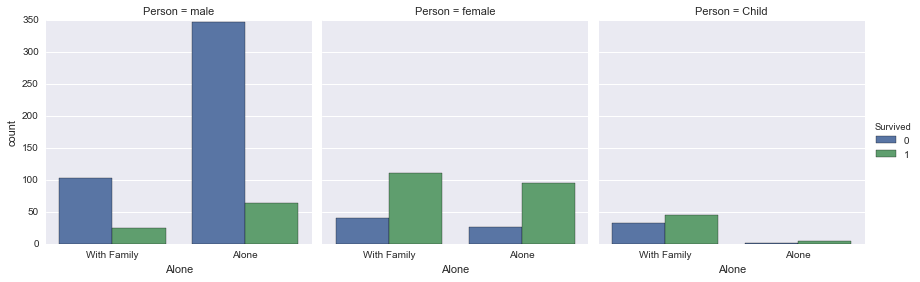

In [212]:
fg = sns.factorplot('Alone', data = titanic_train,kind = 'count', hue = 'Survived',col = 'Person')

In [75]:
#deck = df['Cabin'].dropna()

In [76]:
#d = []
#for c in deck:
 #   d.append(c[0])

In [80]:
#len(d)

204

In [213]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [216]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,female,Alone
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,female,Alone


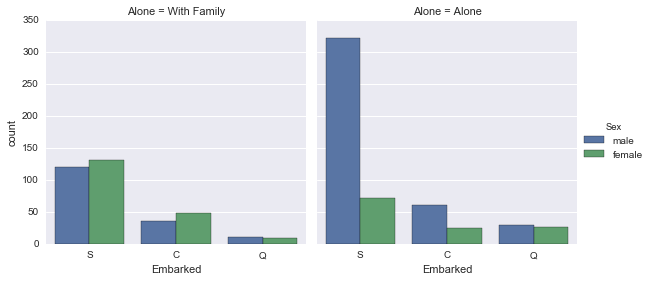

In [217]:
sns.factorplot('Embarked', data = titanic_train, kind = 'count',hue = 'Sex',col = 'Alone')

In [219]:
titanic_train['Embarked'].loc [titanic_train['Embarked'].isnull()]= 'S'
titanic_test['Embarked'].loc [titanic_test['Embarked'].isnull()]= 'S'

In [220]:
titanic_train = titanic_train.drop(['PassengerId','Name','Ticket'], axis=1)


In [222]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


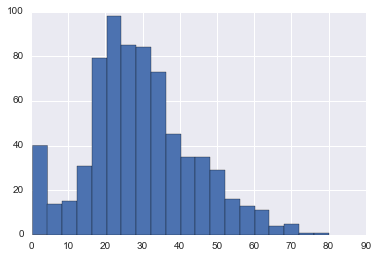

In [223]:
titanic_train['Age'].hist(bins=20)

In [331]:
embark_dummies_train  = pd.get_dummies(titanic_train['Embarked'])

embark_dummies_test = pd.get_dummies(titanic_test['Embarked'])

In [345]:
#embark_dummies_train.columns = ('C Emb','Q Emb','S Emb')
#embark_dummies_test.columns = ('C Emb','Q Emb','S Emb')

In [353]:
#titanic_train.drop(['S Emb'],axis = 1, inplace = True) 
titanic_train = titanic_train.join(person_dummies_titanic)
titanic_test  = titanic_test.join(person_dummies_test)


In [359]:
titanic_train.drop(['Embarked'], axis = 1, inplace = True)

In [360]:
titanic_test.drop(['Embarked'], axis = 1, inplace = True)

In [228]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Person         418 non-null object
Alone          418 non-null object
C              418 non-null float64
Q              418 non-null float64
S              418 non-null float64
dtypes: float64(5), int64(4), object(7)
memory usage: 52.3+ KB


In [232]:
#There are missing values for fare in test data set.

titanic_test['Fare'].fillna(titanic_test['Fare'].median(),inplace = True)

#Convert float to integer

titanic_train['Fare'] = titanic_train['Fare'].astype(int)
titanic_test['Fare']=titanic_test['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_train["Fare"][titanic_train["Survived"] == 0]
fare_survived     = titanic_train["Fare"][titanic_train["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])


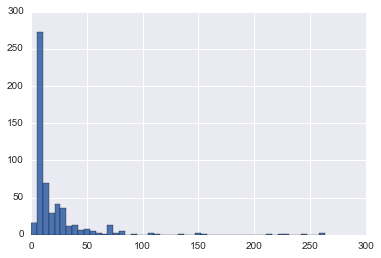

In [239]:
fare_not_survived.hist(bins=50)

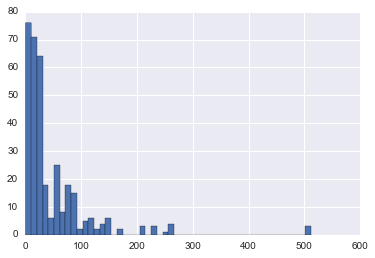

In [240]:
fare_survived.hist(bins=50)

C:\Users\hp\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x31b5a828>],
 'caps': [<matplotlib.lines.Line2D at 0x31b6a710>,
 'fliers': [<matplotlib.lines.Line2D at 0x31bb67b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x31bb6240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x31b5ab70>,
  <matplotlib.lines.Line2D at 0x31b6a198>]}

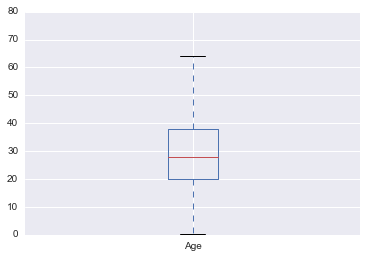

In [241]:
titanic_train.boxplot('Age')

C:\Users\hp\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hp\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


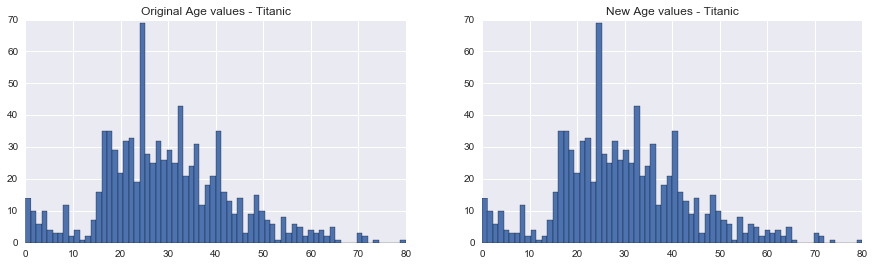

In [253]:
# Age

# Set the axis to plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# calculate mean, std and count of Nan in train data

average_age_train = titanic_train['Age'].mean()
std_age_train = titanic_train['Age'].std()
count_nan_age_train = titanic_train['Age'].isnull().sum()

# calculate mean, std and count of Nan in test data

average_age_test = titanic_test['Age'].mean()
std_age_test = titanic_test['Age'].std()
count_nan_age_test = titanic_test['Age'].isnull().sum()

# Generate random numbers between (mean-sd) & (mean+sd) to fit in missing age data
rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_age_train)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_train['Age'].dropna().astype(int).hist(bins=70,ax = axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_train["Age"][np.isnan(titanic_train["Age"])] = rand_1
titanic_test["Age"][np.isnan(titanic_test["Age"])] = rand_2

# convert from float to int
titanic_train['Age'] = titanic_train['Age'].astype(int)
titanic_test['Age']    = titanic_test['Age'].astype(int)
        
# plot new Age Values
titanic_train['Age'].hist(bins=70,ax = axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

In [270]:

titanic_train['Age'].isnull().sum()

#titanic_test['Age'].isnull().sum()


0

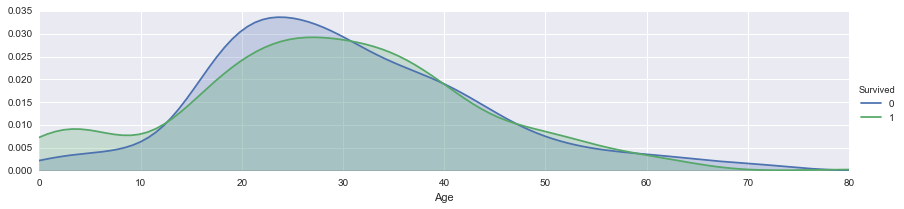

In [276]:
# plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_train['Age'].max()))
facet.add_legend()



NameError: name 'barplot' is not defined

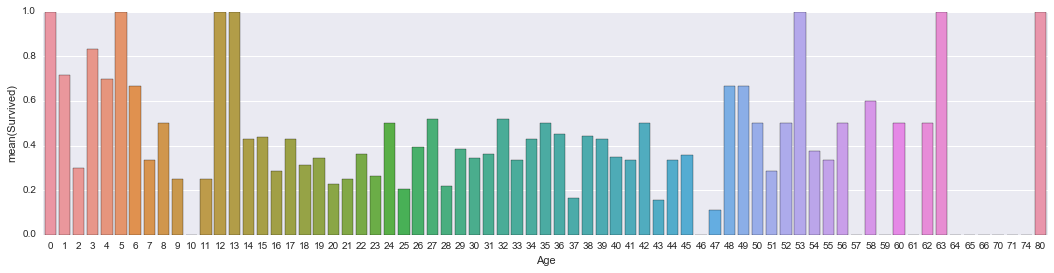

In [308]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)


In [278]:
# Drop Cabin as it has lot of Nan values in both train & Test

# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_train.drop("Cabin",axis=1,inplace=True)
titanic_test.drop("Cabin",axis=1,inplace=True)

[<matplotlib.text.Text at 0x35c1ea58>, <matplotlib.text.Text at 0x35ff6048>]

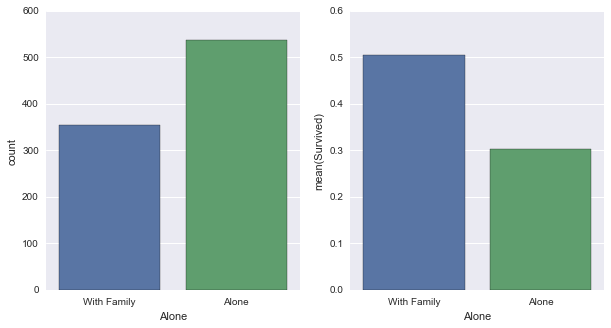

In [306]:
# Plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Alone',data=titanic_train,kind='count',ax=axis1)
sns.countplot(x='Alone', data=titanic_train, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_train[["Alone", "Survived"]].groupby(['Alone'],as_index=False).mean()

sns.barplot(x='Alone', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [310]:
# We can drop Sex column as we already created Person
titanic_train.drop(['Sex'],axis = 1, inplace = True)
titanic_test.drop(['Sex'],axis = 1, inplace = True)

In [ ]:
# create dummy variables for Person column, & first try without dropping Male and then drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_train['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
#person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(titanic_test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
#person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_train = titanic_train.join(person_dummies_titanic)
titanic_test  = titanic_test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_train, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])


In [ ]:

titanic_train.drop(['Person'],axis=1,inplace=True)
titanic_test.drop(['Person'],axis=1,inplace=True)

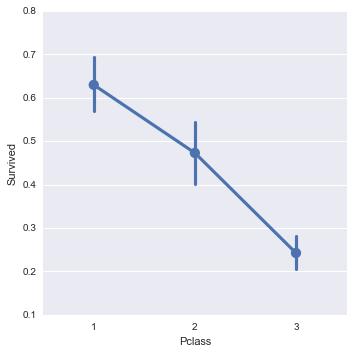

In [322]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_train,size=5)

# create dummy variables for Pclass column,  
pclass_dummies_titanic  = pd.get_dummies(titanic_train['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
#pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(titanic_test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
#pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)



In [323]:

titanic_train.drop(['Pclass'],axis=1,inplace=True)
titanic_test.drop(['Pclass'],axis=1,inplace=True)
titanic_train = titanic_train.join(pclass_dummies_titanic)
titanic_test  = titanic_test.join(pclass_dummies_test)

In [328]:
titanic_train.head()

,Survived,Age,Fare,Embarked,Alone,C,Q,S,Child,Female,Male,Class_1,Class_2,Class_3
0,0,22,7,S,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38,71,C,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26,7,S,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,35,53,S,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,35,8,S,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [373]:
# define training and testing sets

X_train = titanic_train.drop("Survived",axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop(["PassengerId","Name","Ticket"],axis=1).copy()

In [364]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
Age        891 non-null int32
Fare       891 non-null int32
Alone      891 non-null object
C          891 non-null float64
Q          891 non-null float64
S          891 non-null float64
Child      891 non-null float64
Female     891 non-null float64
Male       891 non-null float64
Class_1    891 non-null float64
Class_2    891 non-null float64
Class_3    891 non-null float64
dtypes: float64(9), int32(2), object(1)
memory usage: 83.5+ KB


In [374]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Age        418 non-null int32
Fare       418 non-null int32
Alone      418 non-null object
C          418 non-null float64
Q          418 non-null float64
S          418 non-null float64
Child      418 non-null float64
Female     418 non-null float64
Male       418 non-null float64
Class_1    418 non-null float64
Class_2    418 non-null float64
Class_3    418 non-null float64
dtypes: float64(9), int32(2), object(1)
memory usage: 36.0+ KB


In [365]:
# machine learning
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [378]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
lr.score(X_train,Y_train)

0.40605482022334355

In [379]:
# Logistic Regression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)


0.80695847362514028

In [380]:
 #Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.87654320987654322

In [392]:
# DecisionTree

dtc = DecisionTreeClassifier(random_state=0,criterion = 'entropy')
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
dtc.score(X_train, Y_train)


0.96632996632996637

In [393]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred_RF = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.96632996632996637

In [385]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, Y_train)

0.83389450056116721

In [386]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.77890011223344557

In [387]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.017077
1,Fare,0.000778
2,Alone,-0.304660
3,C,0.488683
4,Q,0.198002
5,S,-0.149403
6,Child,0.706709
7,Female,1.380576
8,Male,-1.550003
9,Class_1,1.182019


In [395]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Y_pred_RF
    })
submission.to_csv('titanic.csv', index=False)